In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("./cars-clean.csv")

In [3]:
ferrari = df[df["make"] == "Ferrari"].drop(["make"], axis = 1)
porsche = df[df["make"] == "Porsche"].drop(["make"], axis = 1)
bmw = df[df["make"] == "BMW"].drop(["make"], axis = 1)

In [4]:
df = bmw

/var/folders/ss/ll1dr_c54xggkv2l3tpb_pvh0000gn/T/ipykernel_40668/1825793946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['sold_price'] >= 250000].index,inplace=True)


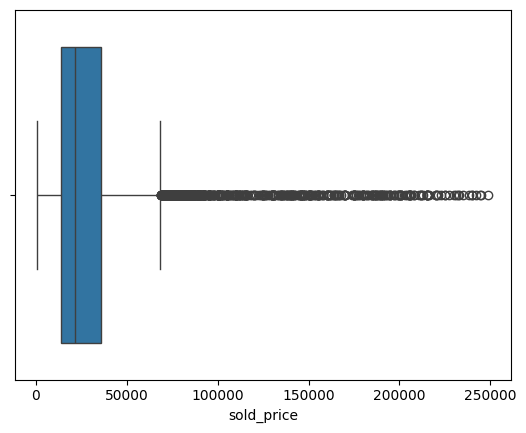

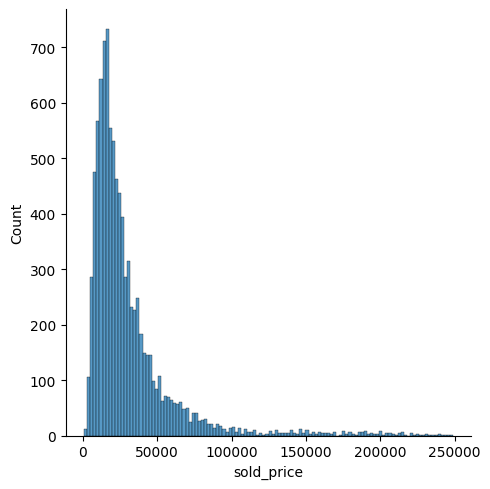

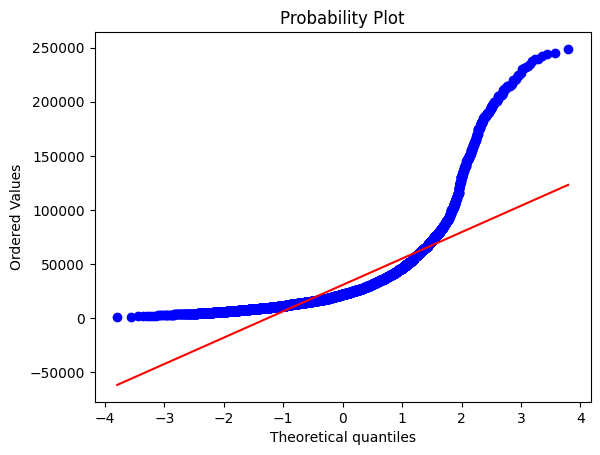

In [5]:
# Replace sold_price with bid_amount for the cars that were not sold
df['sold_price'] = df['sold_price'].fillna(df['bid_amount'])
df = df.dropna()

# Remove outliers
df.drop(df[df['sold_price'] >= 250000].index,inplace=True)
sns.boxplot(x=df['sold_price'])

# Plot distribution of sold_price
sns.displot(df['sold_price'])
fig = plt.figure()
res = stats.probplot(df['sold_price'], plot=plt)


/var/folders/ss/ll1dr_c54xggkv2l3tpb_pvh0000gn/T/ipykernel_40668/2627208176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sold_price'] = np.log(df['sold_price'])
/var/folders/ss/ll1dr_c54xggkv2l3tpb_pvh0000gn/T/ipykernel_40668/2627208176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = np.log1p(df['mileage'])


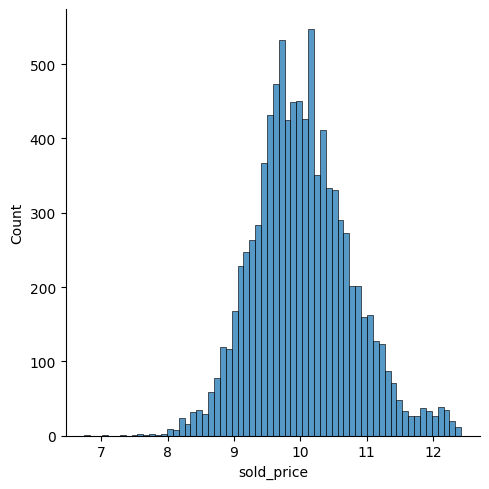

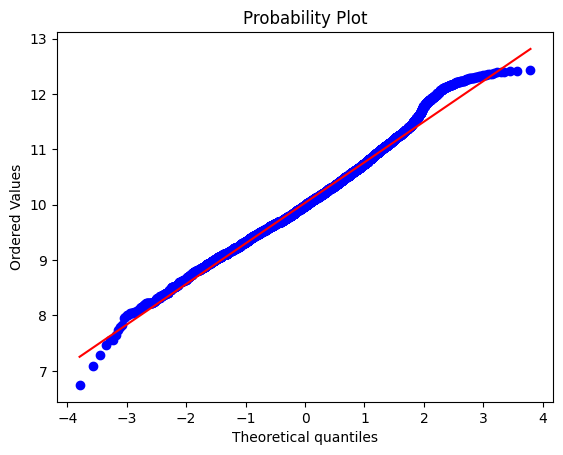

In [6]:
#Log transform sold_price & mileage
df['sold_price'] = np.log(df['sold_price'])
df['mileage'] = np.log1p(df['mileage'])

sns.displot(df['sold_price'])
fig = plt.figure()
res = stats.probplot(df['sold_price'], plot=plt)

In [7]:
df.describe()

,year,mileage,sold_price,bid_amount,bidders,watchers,comments
count,9286.000000,9286.000000,9286.000000,9286.000000,9286.000000,9286.000000,9286.000000
mean,1998.845574,10.739783,10.032633,30603.755008,27.262115,657.880788,49.410726
std,13.009654,1.158093,0.736031,29891.406255,12.663841,296.405294,30.248245
min,1928.000000,0.000000,6.745236,850.000000,1.000000,0.000000,3.000000
25%,1991.000000,10.373522,9.546813,14000.000000,18.000000,461.000000,30.000000
50%,2002.000000,10.968216,9.987369,21750.000000,26.000000,597.000000,42.000000
75%,2007.000000,11.418626,10.488409,35897.000000,35.000000,781.000000,60.000000
max,2025.000000,13.171155,12.424758,248888.000000,96.000000,4384.000000,444.000000


<Axes: >

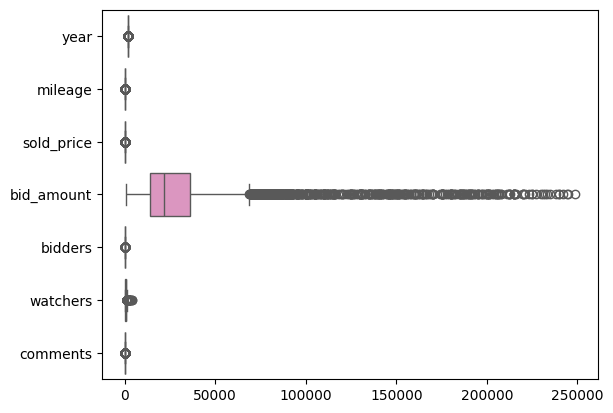

In [8]:
sns.boxplot(data=df,orient='h',palette='Set2')

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'sold_price'}>],
       [<Axes: title={'center': 'bid_amount'}>,
        <Axes: title={'center': 'bidders'}>,
        <Axes: title={'center': 'watchers'}>],
       [<Axes: title={'center': 'comments'}>, <Axes: >, <Axes: >]],
      dtype=object)

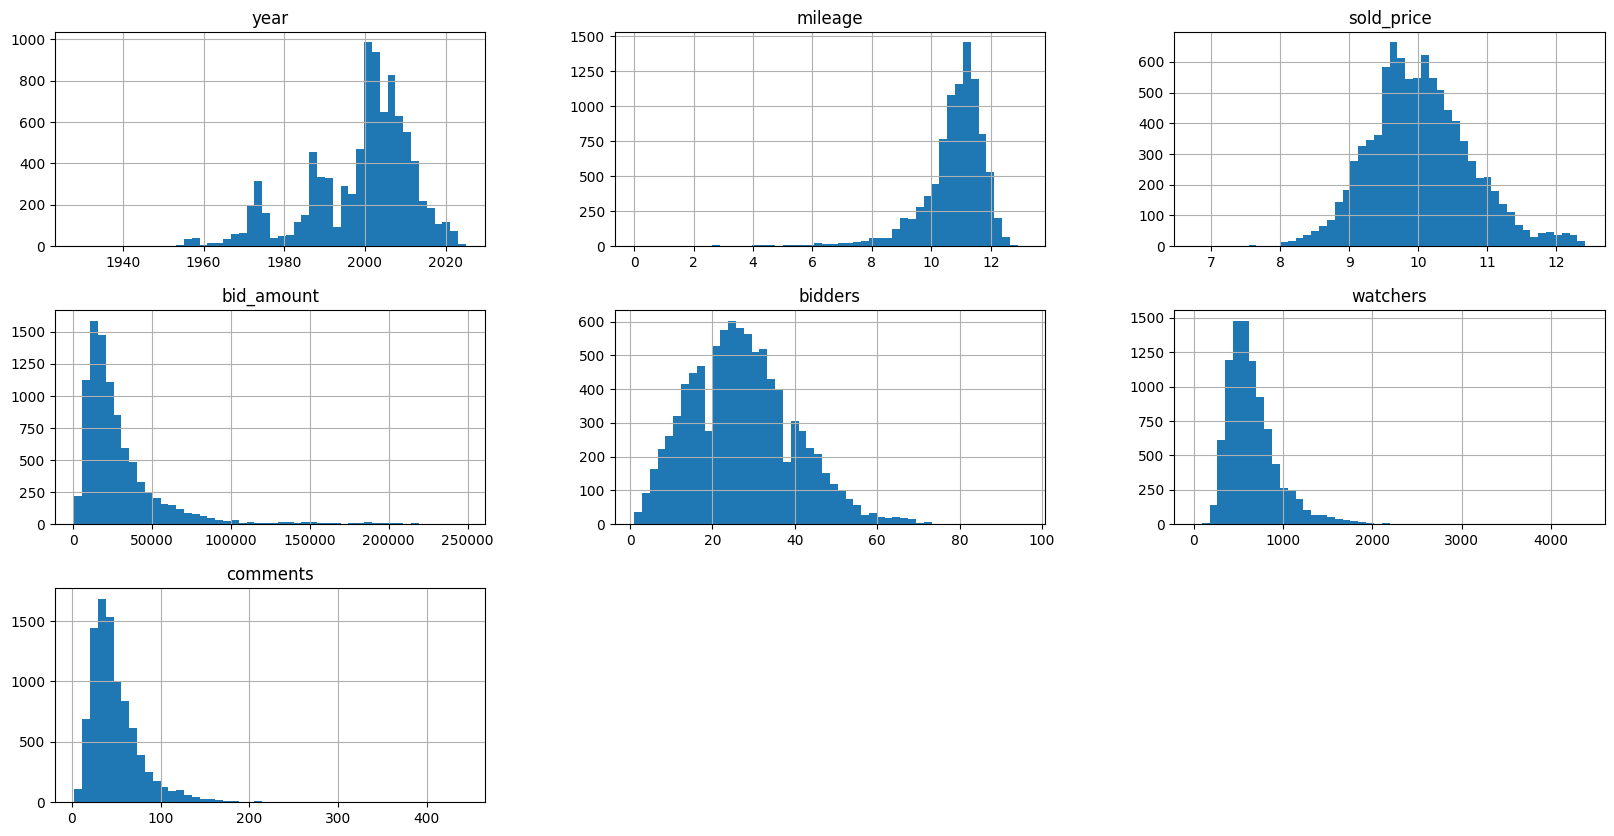

In [9]:
df.hist(figsize=(20,10),bins = 50)

In [10]:
counts=df['model'].value_counts()
# Get top models
frequent_models = counts[counts >= 100].index

# Filter the DataFrame to keep only frequent models
df = df[df['model'].isin(frequent_models)]

#calculating percentage of each brand
popular_labels=frequent_models

colors=['lightslategray',]*len(popular_labels)
colors[0]='crimson'

fig=go.Figure(data=[go.Bar(x=counts[:25],y=popular_labels,marker_color=colors,orientation='h')])
fig.update_layout(title_text='Most represented Models in the Dataset',xaxis_title="Count",yaxis_title="Model")

df.describe()

,year,mileage,sold_price,bid_amount,bidders,watchers,comments
count,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000
mean,2001.121330,10.935830,10.332855,39985.849309,26.921416,719.899827,51.447323
std,6.202588,0.857645,0.661563,38867.445611,12.406640,252.200360,31.369357
min,1986.000000,0.000000,8.318742,4100.000000,1.000000,184.000000,3.000000
25%,1999.000000,10.545368,9.915910,20250.000000,18.000000,540.000000,31.000000
50%,2002.000000,11.104944,10.264721,28702.000000,26.000000,682.000000,44.000000
75%,2005.000000,11.482477,10.626497,41212.500000,35.000000,854.000000,63.000000
max,2021.000000,12.598118,12.424758,248888.000000,78.000000,2106.000000,275.000000


In [11]:
prices = df[['model','sold_price']].groupby('model').mean().sort_values(by='sold_price',ascending=False)
print(prices)

                                      sold_price
model                                           
Z8                                     12.131359
M3                                     11.103776
M3 Coupe Competition Package 6-Speed   10.691852
M3 Coupe 6-Speed                       10.431006
M5                                     10.370221
M3 Coupe                               10.265871
M3 Convertible 6-Speed                 10.176692
M3 Coupe 5-Speed                       10.102698
M3 Convertible                         10.036042
M Roadster                              9.906947
325i Convertible 5-Speed                9.693650
330Ci Convertible                       9.522770


In [12]:
display_p=df[['model','year','sold_price']]

fig=px.box(display_p,x="model",y="sold_price")
fig.update_layout(title_text='Price vs Model',xaxis_title="Model",yaxis_title="Average Price")

In [13]:
def getrange(Price):
    if (Price >= 0 and Price < 50000):
        return '0 - 50000'
    if (Price >= 50000 and Price < 100000):
        return '50000 - 100000'
    if (Price >= 100000 and Price < 150000):
        return '100000 - 150000'
    if (Price >= 150000 and Price < 200000):
        return '150000 - 200000'
    if (Price >= 200000 and Price < 250000):
        return '200000 - 250000'
    if (Price >= 250000 and Price < 300000):
        return '250000 - 300000'
    if (Price >= 300000 and Price < 350000):
        return '300000 - 350000'
    if (Price >= 350000):
        return 'Over 350000'
df['Price Range'] = df.apply(lambda x:getrange(x['sold_price']),axis = 1)

df['Price Range'].value_counts()

Price Range
0 - 50000    2316
Name: count, dtype: int64

In [14]:
#distribution of number of cars over the years
dic = {1970+i : sum(df['year']==1970+i) for i in range(55)}
x_dic = [1970 + i for i in range(55)]
y_dic = [dic[1970 + i] for i in range(55)]

# Plot
fig = go.Figure([go.Bar(x=x_dic, y=y_dic)])

fig.update_layout(title="Car year distribution",
                  xaxis_title="Year",
                  yaxis_title="Count Cars sold")


fig.show()

In [15]:
data_pie = df['transmission'].value_counts()

fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent',insidetextorientation='radial')])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

In [16]:
y = df["sold_price"]
y = pd.DataFrame(y)

In [17]:
X = df.drop(["sold_price","bid_amount","end_date", "bidders", "watchers", "comments", "status", "Price Range"],axis=1)
X

,year,model,mileage,normalized_color,transmission
11,2003,M5,11.082158,Silver,manual
12,2011,M3 Coupe Competition Package 6-Speed,10.859018,White,manual
22,2002,M3 Coupe 6-Speed,11.522886,Blue,manual
25,2011,M3 Coupe,9.952325,White,automatic
28,2004,M3 Convertible 6-Speed,11.580593,Black,manual
...,...,...,...,...,...
15376,2000,M Roadster,11.522886,Silver,manual
15377,2011,M3 Convertible 6-Speed,10.463132,Red,manual
15378,2000,M Roadster,9.741027,Silver,manual
15381,2011,M3 Coupe Competition Package 6-Speed,9.546884,Blue,automatic


In [18]:
from sklearn.preprocessing import LabelEncoder
Lbl_model = LabelEncoder()
Lbl_color = LabelEncoder()
Lbl_trans = LabelEncoder()

#df.make=Lbl.fit_transform(df.make)
X.model=Lbl_model.fit_transform(df.model)
print("Model Mapping:", dict(zip(Lbl_model.classes_, Lbl_model.transform(Lbl_model.classes_))))
X.normalized_color=Lbl_color.fit_transform(df.normalized_color)
print("Color Mapping:", dict(zip(Lbl_color.classes_, Lbl_color.transform(Lbl_color.classes_))))
X.transmission =Lbl_trans.fit_transform(df.transmission)
print("Trans Mapping:", dict(zip(Lbl_trans.classes_, Lbl_trans.transform(Lbl_trans.classes_))))
X

Model Mapping: {'325i Convertible 5-Speed': 0, '330Ci Convertible': 1, 'M Roadster': 2, 'M3': 3, 'M3 Convertible': 4, 'M3 Convertible 6-Speed': 5, 'M3 Coupe': 6, 'M3 Coupe 5-Speed': 7, 'M3 Coupe 6-Speed': 8, 'M3 Coupe Competition Package 6-Speed': 9, 'M5': 10, 'Z8': 11}
Color Mapping: {'Beige': 0, 'Black': 1, 'Blue': 2, 'Bronze': 3, 'Gray': 4, 'Green': 5, 'Orange': 6, 'Purple': 7, 'Red': 8, 'Silver': 9, 'White': 10, 'Yellow': 11}
Trans Mapping: {'automatic': 0, 'manual': 1}


,year,model,mileage,normalized_color,transmission
11,2003,10,11.082158,9,1
12,2011,9,10.859018,10,1
22,2002,8,11.522886,2,1
25,2011,6,9.952325,10,0
28,2004,5,11.580593,1,1
...,...,...,...,...,...
15376,2000,2,11.522886,9,1
15377,2011,5,10.463132,8,1
15378,2000,2,9.741027,9,1
15381,2011,9,9.546884,2,0


In [19]:
# Standard Scaler for Data
#scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#columns = X.columns
#X = scaler.fit_transform(X)
#X = pd.DataFrame(X, columns=columns)
X

,year,model,mileage,normalized_color,transmission
11,2003,10,11.082158,9,1
12,2011,9,10.859018,10,1
22,2002,8,11.522886,2,1
25,2011,6,9.952325,10,0
28,2004,5,11.580593,1,1
...,...,...,...,...,...
15376,2000,2,11.522886,9,1
15377,2011,5,10.463132,8,1
15378,2000,2,9.741027,9,1
15381,2011,9,9.546884,2,0


In [20]:
#scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#y = scaler.fit_transform(y)
#y = pd.DataFrame(y, columns=["sold_price"])

In [31]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle = False)

car_model = RandomForestRegressor(n_estimators=30,random_state=33)
car_model.fit(X_train,y_train)

# Features
# year	model	mileage	normalized_color	transmission
# Calculating Details
print('Random Forest Regressor Train Score is : ' ,  car_model.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , car_model.score(X_test, y_test)) 

predicted = pd.DataFrame(car_model.predict(X_test), index=X_test.index, columns=['predicted'])
car_model.feature_importances_

Random Forest Regressor Train Score is :  0.9707139798596858
Random Forest Regressor Test Score is :  0.8156333680933112


/Users/gioelmolinari/.pyenv/versions/3.10.15/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



array([0.07230038, 0.65815352, 0.20707808, 0.03441521, 0.0280528 ])

In [32]:
X_test.model = Lbl_model.inverse_transform(X_test.model)
X_test.normalized_color = Lbl_color.inverse_transform(X_test.normalized_color)
X_test.transmission = Lbl_trans.inverse_transform(X_test.transmission)
X_test

,year,model,mileage,normalized_color,transmission
12147,2000,M5,11.849405,Black,manual
12149,2001,M3 Convertible 6-Speed,11.082158,Red,manual
12155,2006,M3 Convertible,10.545368,Gray,automatic
12156,1991,M3,12.013707,White,manual
12163,2003,M3 Coupe 6-Speed,11.599112,Black,manual
...,...,...,...,...,...
15376,2000,M Roadster,11.522886,Silver,manual
15377,2011,M3 Convertible 6-Speed,10.463132,Red,manual
15378,2000,M Roadster,9.741027,Silver,manual
15381,2011,M3 Coupe Competition Package 6-Speed,9.546884,Blue,automatic


In [33]:
# TODO fix index
X_analysis = pd.merge(y_test, X_test, how='inner', left_index=True, right_index=True)
X_analysis = pd.merge(X_analysis, predicted, how='inner', left_index=True, right_index=True)
X_analysis

,sold_price,year,model,mileage,normalized_color,transmission,predicted
12147,10.165852,2000,M5,11.849405,Black,manual,10.036626
12149,9.903488,2001,M3 Convertible 6-Speed,11.082158,Red,manual,10.092111
12155,10.165852,2006,M3 Convertible,10.545368,Gray,automatic,10.288702
12156,10.551899,1991,M3,12.013707,White,manual,10.974004
12163,9.838949,2003,M3 Coupe 6-Speed,11.599112,Black,manual,10.242503
...,...,...,...,...,...,...,...
15376,9.564512,2000,M Roadster,11.522886,Silver,manual,9.233466
15377,10.344738,2011,M3 Convertible 6-Speed,10.463132,Red,manual,10.493311
15378,10.341742,2000,M Roadster,9.741027,Silver,manual,10.231663
15381,11.198215,2011,M3 Coupe Competition Package 6-Speed,9.546884,Blue,automatic,10.697281


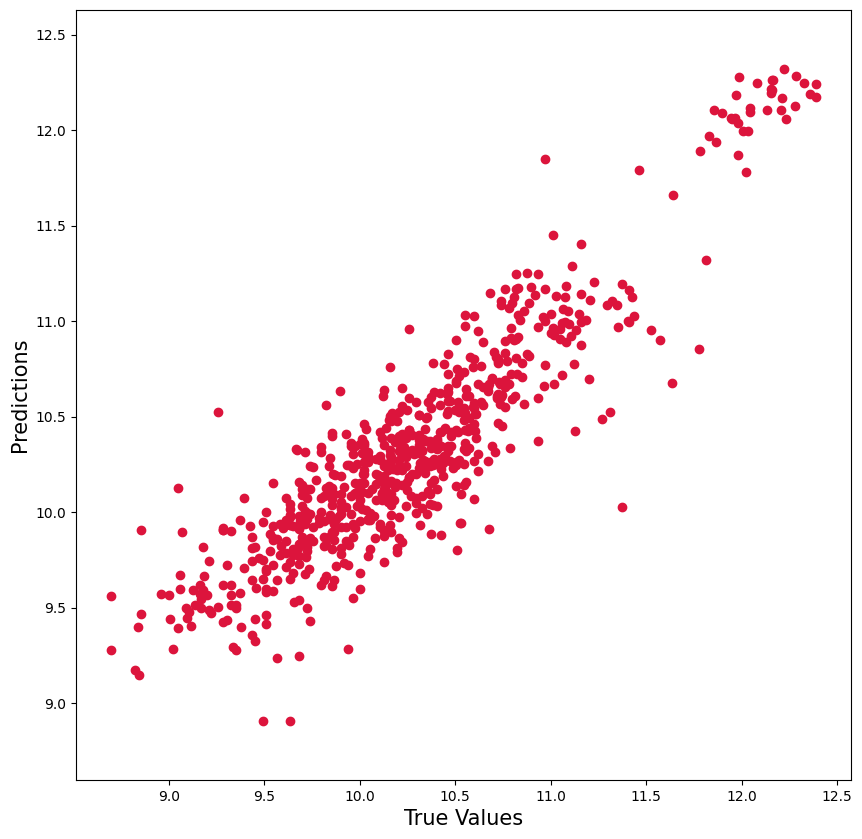

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predicted, c='crimson')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

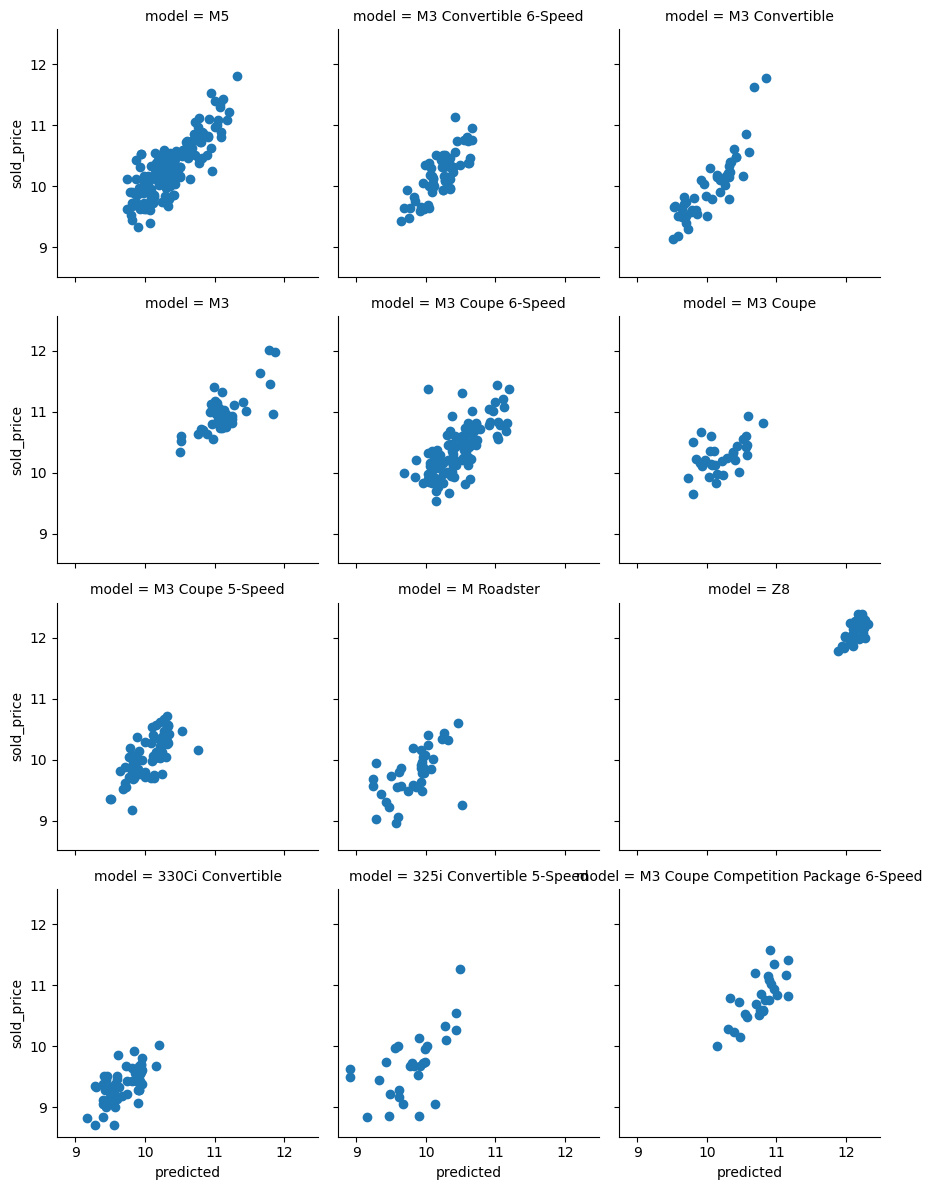

In [35]:
# Create the FacetGrid
g = sns.FacetGrid(X_analysis, col="model", col_wrap=3)

# Map scatter plots to the grid
g.map(plt.scatter, "predicted", "sold_price")